In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from scipy.stats import spearmanr
from false_positive_analysis import percent_false_positive
%config InlineBackend.figure_format='retina'

In [32]:
#read in final mtx
#grab all channels
all_channels = []
# for c in np.arange(2,5,1):
#     mtx = pd.read_csv(f"/groups/CaiLab/personal/Lex/raw/031322_11kgenes_experiment/notebook_pyfiles/genebycell/deepcell_5pos/genebycell_{c}.csv", index_col=0)
#     mtx = mtx.T
#     mtx = mtx[mtx.sum(axis=1)>1000].T
#     all_channels.append(mtx)

for c in np.arange(2,5,1):
    mtx = pd.read_csv(f"/groups/CaiLab/personal/Lex/raw/030922_11kgenes/notebook_pyfiles/genebycell/highexp_first/final/genebycell_{c}.csv", index_col=0)
    mtx = mtx.T
    mtx = mtx[mtx.sum(axis=1)>1000].T
    all_channels.append(mtx)

mtx = pd.concat(all_channels, axis=1).fillna(0)

In [33]:
mtx

,cell3_pos0,cell4_pos0,cell5_pos0,cell6_pos0,cell7_pos0,cell8_pos0,cell9_pos0,cell10_pos0,cell11_pos0,cell12_pos0,...,cell8_pos8,cell10_pos8,cell3_pos9,cell6_pos9,cell7_pos9,cell8_pos9,cell9_pos9,cell10_pos9,cell13_pos9,cell14_pos9
genes,,,,,,,,,,,,,,,,,,,,,
1600012h06rik,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1700017g19rik,3.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1700028j19rik,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1700034h15rik,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1810043g02rik,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cldn18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
fam155a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0
pknox2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0


In [35]:
#read in rnaseq data
rnaseq = pd.read_csv("./RNAseq_files/nih3t3_FPKM.csv")
rnaseq.columns = ["Genes","FPKM"]

In [36]:
#codebook
codebook = pd.read_csv("/groups/CaiLab/personal/Lex/raw/031322_11kgenes_experiment/barcode_key/codebook_string_488.csv", index_col=0)
#separate into true and false codebook
fakebook = codebook[codebook.index.str.startswith("fake")]
codebook = codebook.drop(fakebook.index)

In [21]:
# fp, fake, norm_fpr= percent_false_positive(mtx, codebook, fakebook)
# percent_fp = fp["FP raw"].mean()
# mean_counts = fp["total_counts"].mean()
# sum_counts = fp["total_counts"].sum()
# fp_list = [percent_fp,norm_fpr,mean_counts,sum_counts]

In [22]:
# df_stats = pd.DataFrame(fp_list).T
# df_stats.columns = ["percent fp","false positive rate","mean counts", "total sum"]

In [23]:
# df_stats

In [37]:
#convert data to pseudobulk rnaseq data
bulk = pd.DataFrame(mtx.mean(axis=1)).reset_index()
bulk.columns = ["Genes", "Counts"]

In [38]:
rnaseq["Genes"]=rnaseq["Genes"].str.lower()

In [39]:
comb_1 = pd.merge(rnaseq,bulk)

In [40]:
#pearson calc old rnaseq
linreg = linregress(x = comb_1["FPKM"], y = comb_1["Counts"])
pearsonr = linreg[2]
pearsonr = round(pearsonr,2)
pearsonr

0.66

In [45]:
comb_1["Log Counts"] = np.log2(comb_1["Counts"]+0.1)
comb_1["Log FPKM"] = np.log2(comb_1["FPKM"]+0.1)

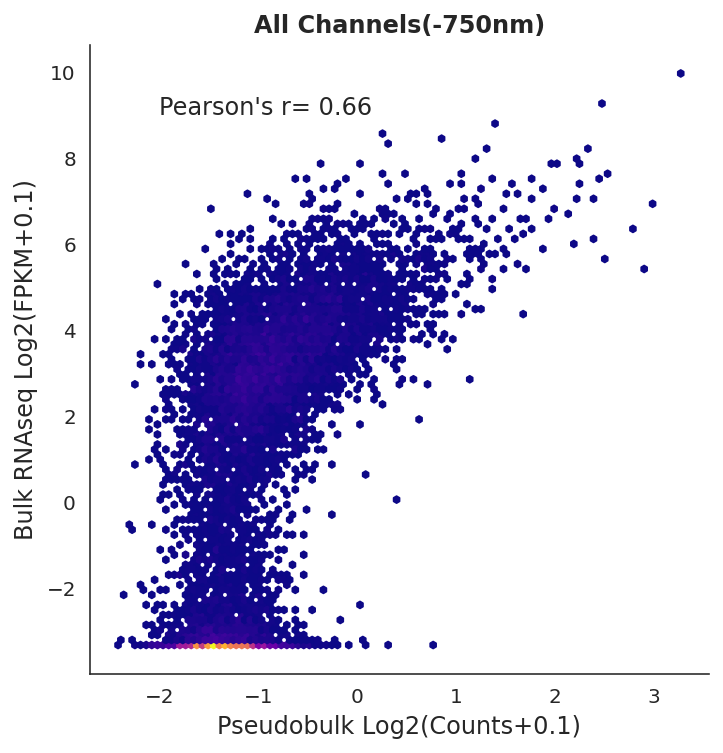

In [46]:
sns.set_style("white")
joint_kws=dict(gridsize=100)
hexplot = sns.jointplot(data=comb_1, x="Log Counts", y="Log FPKM", kind="hex",mincnt=0.1, 
              cmap="plasma", dropna=True, joint_kws=joint_kws)
plt.ylabel("Bulk RNAseq Log2(FPKM+0.1)", fontsize=12)
plt.xlabel("Pseudobulk Log2(Counts+0.1)", fontsize=12)
hexplot.ax_marg_x.remove()
hexplot.ax_marg_y.remove()
plt.annotate(f"Pearson's r= {pearsonr}", (-2.0,9.0), fontsize=12)
plt.title("All Channels(-750nm)", fontweight="bold")
sns.despine()